# Train-Test Split and Data Merging
#### We applied the train_test_split function to three different folders containing image data, splitting each folder's data into training and testing sets. The folders included:

## Alphabets Data: 
#### This folder contained images of handwritten alphabets.
## Preprocessed Words Data: 
#### This folder contained images of preprocessed handwritten words.
## KHATT Data:
#### This folder contained images from the KHATT dataset.


#### For each folder, we split the data into training and testing sets with a ratio of 80:20, preserving the distribution of classes in each set. After splitting the data, we merged the training data of the three folders together to create the final training dataset. Similarly, we merged the testing data of the three folders together to create the final testing dataset.

#### This approach ensured that our model was trained and evaluated on a diverse set of data, encompassing different writing styles and variations present in the three datasets.

In [3]:
import os
from sklearn.model_selection import train_test_split

# Paths to the directories containing the data
dataset_directory = "/kaggle/input/modified/dataset_1"
images_directory = os.path.join(dataset_directory, "images")
labels_directory = os.path.join(dataset_directory, "labels")

def load_data(images_path, labels_path):
    images = []
    labels = []
    for folder_name in os.listdir(images_path):
        folder_path = os.path.join(images_path, folder_name)
        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                if os.path.isfile(image_path):  # Check if it's a file
                    images.append(image_path)
                    label_file_path = os.path.join(labels_path, folder_name + ".txt")
                    with open(label_file_path, 'r', encoding='utf-8') as label_file:
                        label = label_file.read().strip()
                    labels.append(label)
    return images, labels


# Load data for alphabets
alphabets_images, alphabets_labels = load_data(os.path.join(images_directory, "alphabets"), os.path.join(labels_directory, "alphabet_labels"))
print("Number of alphabet images:", len(alphabets_images))
# Split the alphabets data
alphabets_train_images, alphabets_test_images, alphabets_train_labels, alphabets_test_labels = train_test_split(alphabets_images, alphabets_labels, test_size=0.2, random_state=42)

# Load data for preprocessed words
preprocessed_words_images, preprocessed_words_labels = load_data(os.path.join(images_directory, "preprocessed_words"), os.path.join(labels_directory, "words_labels"))
print("Number of preprocessed words images:", len(preprocessed_words_images))
# Split the preprocessed words data
preprocessed_words_train_images, preprocessed_words_test_images, preprocessed_words_train_labels, preprocessed_words_test_labels = train_test_split(preprocessed_words_images, preprocessed_words_labels, test_size=0.2, random_state=42)


# Merge the splits
train_images = alphabets_train_images + preprocessed_words_train_images 
train_labels = alphabets_train_labels + preprocessed_words_train_labels 
test_images = alphabets_test_images + preprocessed_words_test_images 
test_labels = alphabets_test_labels + preprocessed_words_test_labels 


# Check Split Size
print("Size of training set:", len(train_images))
print("Size of testing set:", len(test_images))

# Cross-Check Correspondence
import random

# Print a few random samples from the training set
for _ in range(5):
    index = random.randint(0, len(train_images) - 1)
    print("Training Image:", train_images[index])
    print("Training Label:", train_labels[index])
    print()

# Print a few random samples from the testing set
for _ in range(5):
    index = random.randint(0, len(test_images) - 1)
    print("Testing Image:", test_images[index])
    print("Testing Label:", test_labels[index])
    print()

Number of alphabet images: 53300
Number of preprocessed words images: 8144
Size of training set: 49155
Size of testing set: 12289
Training Image: /kaggle/input/modified/dataset_1/images/alphabets/waw_regular/user070_waw_regular_022.png
Training Label: و

Training Image: /kaggle/input/modified/dataset_1/images/alphabets/beh_middle/user069_beh_middle_009.png
Training Label: ب

Training Image: /kaggle/input/modified/dataset_1/images/alphabets/feh_begin/user021_feh_begin_043.png
Training Label: ف

Training Image: /kaggle/input/modified/dataset_1/images/alphabets/yaa_end/user008_yaa_end_022.png
Training Label: ي

Training Image: /kaggle/input/modified/dataset_1/images/alphabets/alif_regular/user077_alif_regular_045.png
Training Label: ا

Testing Image: /kaggle/input/modified/dataset_1/images/alphabets/meem_begin/user018_meem_begin_037.png
Testing Label: م

Testing Image: /kaggle/input/modified/dataset_1/images/alphabets/heh_end/user032_heh_end_039.png
Testing Label: ه

Testing Image: /kaggl

In [8]:
from sklearn.model_selection import train_test_split
def load_data(images_path, labels_folder):
    images = []
    labels = []
    for image_name in os.listdir(images_path):
        image_path = os.path.join(images_path, image_name)
        if os.path.isfile(image_path) and image_name.lower().endswith(('.tif', '.png', '.jpg', '.jpeg')):
            images.append(image_path)
            label_file_name = os.path.splitext(image_name)[0] + ".txt"
            label_file_path = os.path.join(labels_folder, label_file_name)
            if os.path.isfile(label_file_path):
                with open(label_file_path, 'r', encoding='utf-8') as label_file:
                    label = label_file.read().strip()
                labels.append(label)
            else:
                labels.append(None)  # No label file found
    return images, labels

# Example usage
khatt_images_path = "/kaggle/input/modified/dataset_1/images/KHATT images"
khatt_labels_folder = "/kaggle/input/modified/dataset_1/labels/KHATT labels"
khatt_images, khatt_labels = load_data(khatt_images_path, khatt_labels_folder)
print("Number of KHATT images:", len(khatt_images))

# Split the KHATT data
khatt_train_images, khatt_test_images, khatt_train_labels, khatt_test_labels = train_test_split(khatt_images, khatt_labels, test_size=0.2, random_state=42)

# Check the split sizes
print("Size of KHATT training set:", len(khatt_train_images))
print("Size of KHATT testing set:", len(khatt_test_images))


Number of KHATT images: 4951
Size of KHATT training set: 3960
Size of KHATT testing set: 991


## Merge the splits


In [9]:
train_images = alphabets_train_images + preprocessed_words_train_images + khatt_train_images
train_labels = alphabets_train_labels + preprocessed_words_train_labels + khatt_train_labels
test_images = alphabets_test_images + preprocessed_words_test_images + khatt_test_images
test_labels = alphabets_test_labels + preprocessed_words_test_labels + khatt_test_labels

# Check the sizes of the merged sets
print("Size of training set:", len(train_images))
print("Size of testing set:", len(test_images))


Size of training set: 53115
Size of testing set: 13280


## Combine all labels into one list


In [10]:
all_labels = train_labels + test_labels

# Calculate the number of classes
num_classes = len(set(all_labels))

print("Number of classes:", num_classes)


Number of classes: 325


## Reshaping the processed images and labels

In [11]:
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Fixed size for resizing images
IMG_SIZE = (32, 32)

# Function to preprocess images
def preprocess_images(images):
    processed_images = []
    for image_path in images:
        # Load and resize image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, IMG_SIZE)
        # Normalize pixel values
        image = image / 255.0
        processed_images.append(image)
    return np.array(processed_images)

# Resize and preprocess training images
train_images_processed = preprocess_images(train_images)
# Resize and preprocess testing images
test_images_processed = preprocess_images(test_images)

# Combine training and testing labels
all_labels = train_labels + test_labels

# Fit label encoder on all labels and transform both training and testing labels
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)
train_labels_encoded = all_labels_encoded[:len(train_labels)]
test_labels_encoded = all_labels_encoded[len(train_labels):]

# Check the shapes of the processed images and labels
print("Shape of training images:", train_images_processed.shape)
print("Shape of testing images:", test_images_processed.shape)
print("Shape of training labels:", train_labels_encoded.shape)
print("Shape of testing labels:", test_labels_encoded.shape)

Shape of training images: (53115, 32, 32)
Shape of testing images: (13280, 32, 32)
Shape of training labels: (53115,)
Shape of testing labels: (13280,)


# model without data augmentation

# Model Architecture:
#### Input shape: 32x32 pixels, single-channel (grayscale).
#### Three convolutional layers followed by max-pooling layers.
#### Flattening layer to prepare for fully connected layers.
#### Dense layers with ReLU activation and dropout for regularization.
#### Bidirectional LSTM layer for sequence processing.
#### Output layer with softmax activation for multi-class classification.
## Model Compilation:
#### Compiled using Adam optimizer.
#### Sparse categorical crossentropy loss function.


In [13]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, LSTM, Bidirectional


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Reshape, Bidirectional

# Define the improved CNN-RNN model with bidirectional LSTM (without Transformer)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Reshape((1, 128)),  # Reshape to add the time dimension
    Bidirectional(LSTM(128, return_sequences=True)),
    Flatten(),
    Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your dataset
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 1, 256)         │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 325)            │        83,525 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 660,549 (2.52 MB)

 Trainable params: 660,549 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:

# Train the model
history=model.fit(train_images_processed.reshape(-1, 32, 32, 1), train_labels_encoded, epochs=15, batch_size=32, validation_data=(test_images_processed.reshape(-1, 32, 32, 1), test_labels_encoded))

Epoch 1/15
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.1385 - loss: 3.3597 - val_accuracy: 0.4104 - val_loss: 2.0485
Epoch 2/15
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.4831 - loss: 1.7743 - val_accuracy: 0.5629 - val_loss: 1.4781
Epoch 3/15
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.6258 - loss: 1.2567 - val_accuracy: 0.6248 - val_loss: 1.2505
Epoch 4/15
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.7005 - loss: 0.9809 - val_accuracy: 0.6590 - val_loss: 1.1450
Epoch 5/15
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.7496 - loss: 0.8115 - val_accuracy: 0.6850 - val_loss: 1.0515
Epoch 6/15
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.7927 - loss: 0.6649 - val_accuracy: 0.6898 - val_loss: 1.0436
Epoch 7/15
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.8283 - loss: 0.5523 - val_accuracy: 0.6900 - val_loss: 1.0714
Epoch 8/15
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.8559 -

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_processed.reshape(-1, 32, 32, 1), test_labels_encoded)
print('Test accuracy:', test_acc)

415/415 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7011 - loss: 1.2751
Test accuracy: 0.7049698829650879


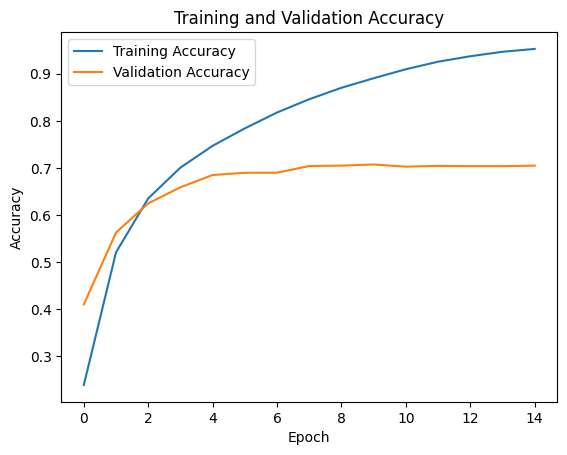

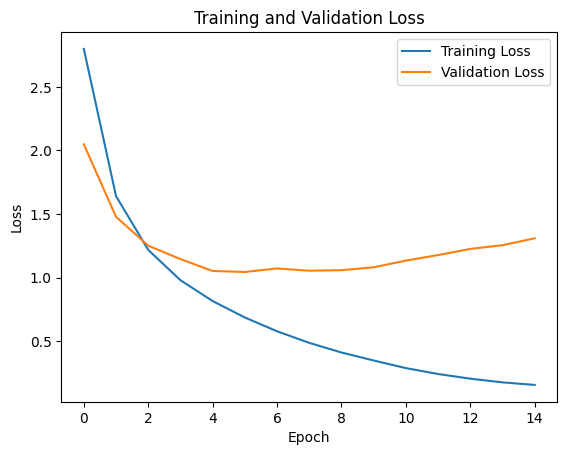

In [17]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# prediction on an image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Predicted class: رؤوف


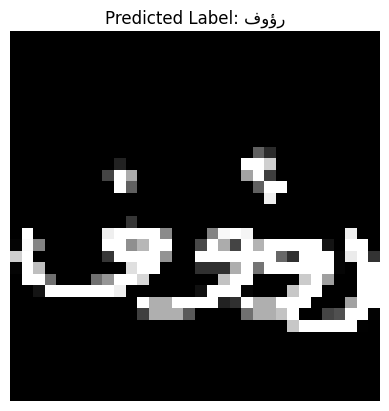

In [18]:
import cv2
import numpy as np

# Load a new image
new_image_path = "/kaggle/input/modified/dataset_1/images/KHATT images/AHTD3A0003_Para1_1_word16.png"
new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)
new_image_resized = cv2.resize(new_image, (32, 32))
new_image_processed = new_image_resized / 255.0  # Normalize pixel values

# Reshape the image for prediction
input_image = new_image_processed.reshape(1, 32, 32, 1)

# Make predictions
predictions = model.predict(input_image)
predicted_class = np.argmax(predictions)

# Decode the predicted class
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

print("Predicted class:", predicted_label)
import matplotlib.pyplot as plt

# Define a function to display the image and its label
def show_image(image, label):
    reversed_label = label[::-1]  # Reverse the label
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title("Predicted Label: " + reversed_label)
    plt.axis('off')
    plt.show()

# Display the new image and its predicted label
show_image(new_image_resized, predicted_label)


In [20]:
import os

def load_class_labels_from_folders(folder_path):
    class_labels = []
    for root, _, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                labels = [line.strip() for line in file]
                class_labels.extend(labels)
    return class_labels

# Load class labels from folders
folder_path = '/kaggle/input/modified/dataset_1/labels'
class_labels = load_class_labels_from_folders(folder_path)



In [21]:

# Print the first 10 class labels
for label in class_labels[:10]:
    print(label)


لؤي
فا
ق
جاري
ص غ
بكلما
أ
ة
ت قوا
ء


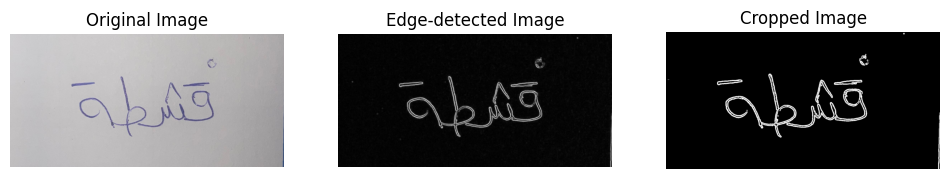

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


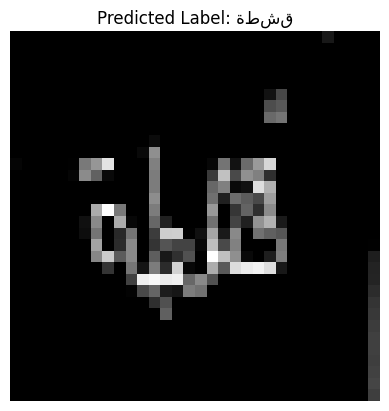

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Helper function to plot an image
def implt(img, cmap=None, title=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# Sobel operator function
def sobel(channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)
    sobel[sobel > 255] = 255
    return np.uint8(sobel)

# Edge detection function
def edge_detect(im):
    return np.max(np.array([sobel(im[:,:,0]), sobel(im[:,:,1]), sobel(im[:,:,2])]), axis=0)

# Function to process image and predict label
def process_and_predict_label(image_path, model, label_encoder):
    # Load the image
    image = cv2.imread(image_path)
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (5, 5), 18)
    
    # Detect edges using the Sobel operator
    edges = edge_detect(blurred)
    
    # Apply thresholding to enhance contrast between text and background
    _, binary_image = cv2.threshold(edges, 50, 255, cv2.THRESH_BINARY)
    
    # Find contours to locate the handwritten word
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Calculate the bounding box that includes all contours
    x_min, y_min = float('inf'), float('inf')
    x_max, y_max = 0, 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x + w)
        y_max = max(y_max, y + h)
    
    # Add a margin around the bounding box
    margin = 10
    x_min = max(0, x_min - margin)
    y_min = max(0, y_min - margin)
    x_max = min(image.shape[1], x_max + margin)
    y_max = min(image.shape[0], y_max + margin)
    
    # Crop the image to the bounding box region
    cropped_image = binary_image[y_min:y_max, x_min:x_max]
    
    # Visualize the original, edge-detected, and cropped images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge-detected Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cropped_image, cmap='gray')
    plt.title('Cropped Image')
    plt.axis('off')
    
    plt.show()
    
    # Resize the cropped image to match the model input size (32x32)
    resized_image = cv2.resize(cropped_image, (32, 32), interpolation=cv2.INTER_AREA)
    
    # Reshape the image for model prediction
    input_image = resized_image.reshape(1, 32, 32, 1) / 255.0  # Normalize
    
    # Predict the label of the word
    predictions = model.predict(input_image)
    predicted_class = predictions.argmax(axis=-1)
    
    # Decode the predicted class
    predicted_label = label_encoder.inverse_transform(predicted_class)[0]
    reversed_label = predicted_label[::-1]  # Reverse the label
    
    # Plot the resized image with the predicted label
    plt.imshow(resized_image, cmap='gray')
    plt.title("Predicted Label: " + reversed_label)
    plt.axis('off')
    plt.show()

# Process image and predict label
image_path = "/kaggle/input/newimage/WhatsApp Image 2024-05-20 at 12.21.06 AM.jpeg"
process_and_predict_label(image_path, model, label_encoder)


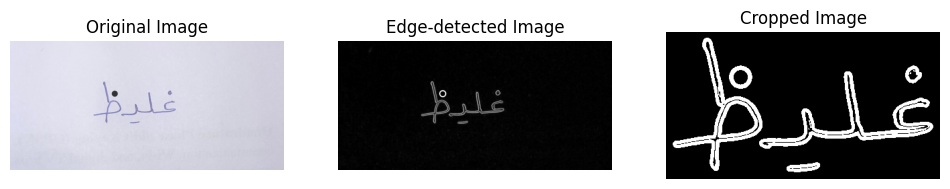

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


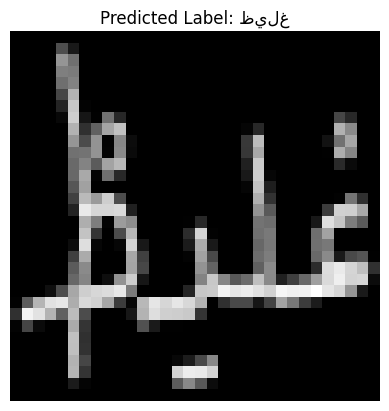

In [39]:
# Process image and predict label
image_path = "/kaggle/input/ghalleeeee/WhatsApp Image 2024-05-20 at 3.26.00 AM.jpeg"
process_and_predict_label(image_path, model, label_encoder)

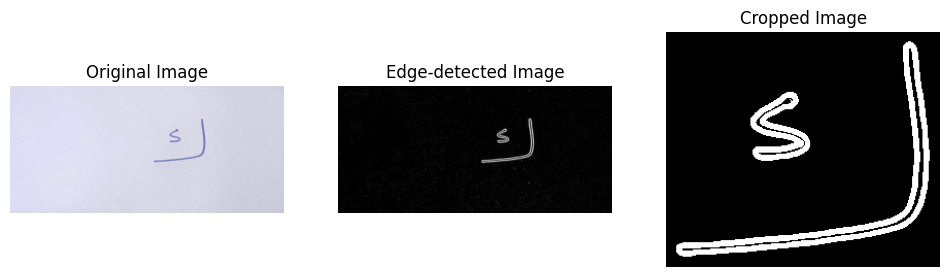

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


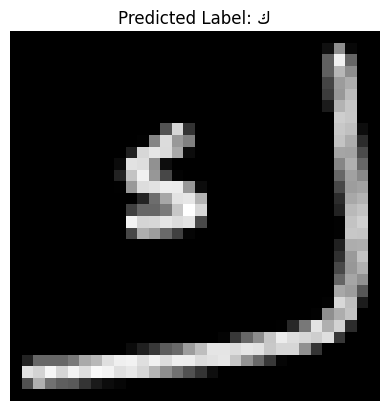

In [42]:
# Process image and predict label
image_path = "/kaggle/input/datanew/WhatsApp Image 2024-05-20 at 3.29.42 AM.jpeg"
process_and_predict_label(image_path, model, label_encoder)

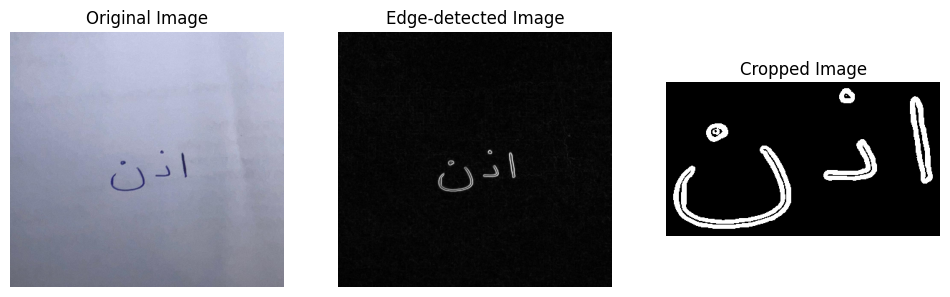

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


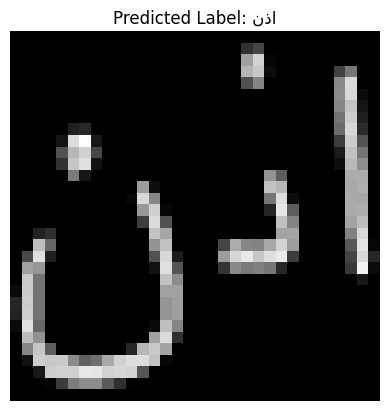

In [34]:
# Process image and predict label
image_path = "/kaggle/input/unknown22/WhatsApp Image 2024-05-20 at 2.02.34 AM.jpeg"
process_and_predict_label(image_path, model, label_encoder)

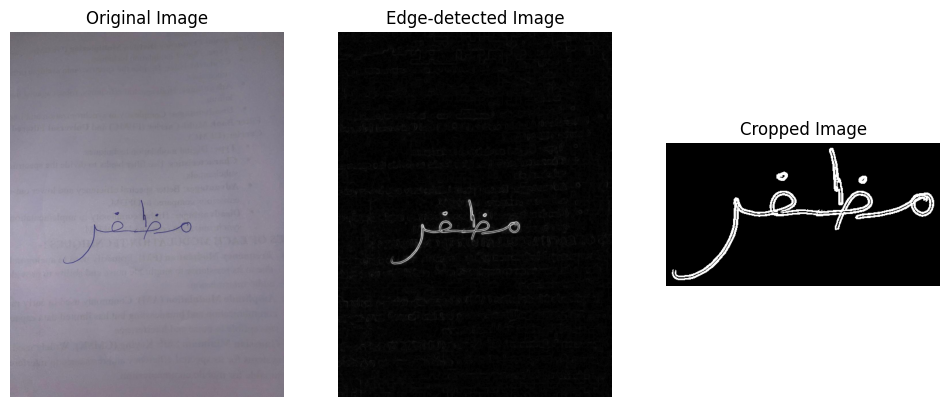

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


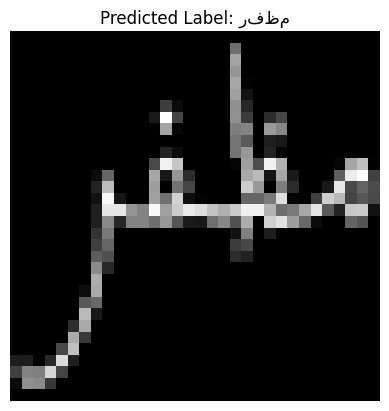

In [54]:
# Process image and predict label
image_path = "/kaggle/input/lassrtttttttt/WhatsApp Image 2024-05-20 at 3.45.19 AM.jpeg"
process_and_predict_label(image_path, model, label_encoder)

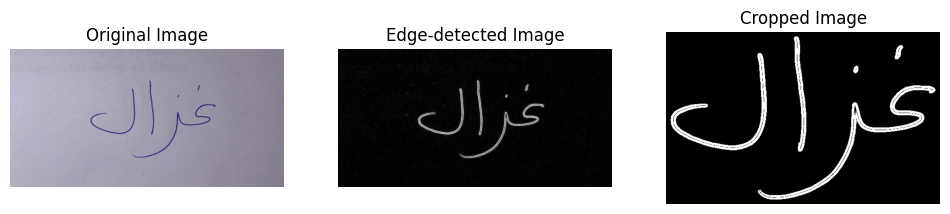

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


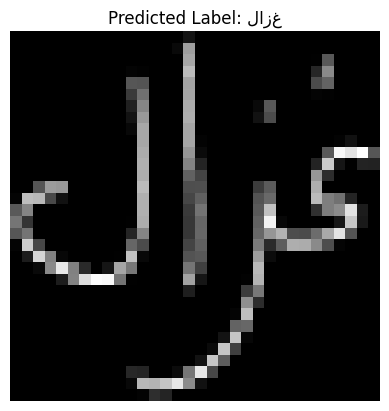

In [72]:
# Process image and predict label
image_path = "/kaggle/input/lastimage2/WhatsApp Image 2024-05-20 at 3.59.34 AM.jpeg"
process_and_predict_label(image_path, model, label_encoder)